데이터작업 순서
1. 로딩
1. 정제
    1. 컬럼이름 확인, 이름 없으면 직접 이름쓰기
    1. 인덱스 확인, 필요하면 변경
    1. 누락데이터 확인
        1. 누락 행이 적으면 버려도 ok
        1. 누락 행이 많으면 평균값으로 채우기
        1. 누락 컬럼이 많으면 버리기
    1. 필요없는 컬럼 제거
1. 분석 EDA
    1. 컬럼별로 그래프 그리기
        1. 수치 : 히스토그램, plot
        1. 카테고리 : value_counts(), 히스토그램, bar, pie
    1. 컬럼간의 관계
        1. groupby
    1. 전체 통계
        1. info(), hist(), boxplot(), plot()
1. 정규화
    1. 이상치 유무, 값 분포 확인
    1. 정규화 방법 선택 > 다항특성(x1**2, x2*x2)
1. 원핫인코딩
1. x, y 분리
1. train/test 분리
1. 단순한 모델부터 뉴럴네트워크까지 fit > score
1. 예측 시각화
1. 예측 설명

모델
1. 예측 모델     : Y = WX + b          / MSE/결정계수 R^2
1. 2진 분류 모델 : Y = sigmoid(WX + b) / CE /정확도(X), recall, precision 
1. 멀티 분류     : Y = softmax(WX + b) / CE /정확도, mAP(mean average precision)
1. 시계열/시퀀스
   내일만 예측          : RNN(GRU, LSTM)
   내일부터 일주일 예측 : RNN, sequence 2 sequence

In [17]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.linear_model import LinearRegression

california house price
y : 집값예측
x : 집값제외
모델 : LR, tf.NN

In [18]:
df = pd.read_csv('./datasets/housing.csv')
df.shape

(20640, 10)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [20]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


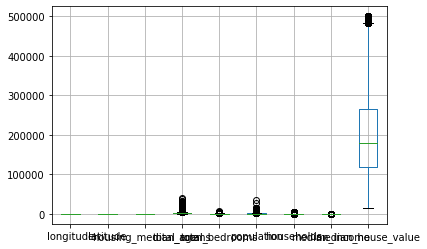

In [21]:
df.boxplot()

In [22]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [23]:
df = df.dropna()
df.shape

(20433, 10)

In [27]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [30]:
df = pd.get_dummies(df)
df.shape

(20433, 14)

In [31]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
x.shape, y.shape

((20433, 13), (20433,))

In [32]:
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1


In [35]:
y.value_counts()

0    17805
1     2628
Name: ocean_proximity_NEAR OCEAN, dtype: int64

정규화

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
x = np.array(x).astype(np.float32)
y = np.array(y).astype(np.float32).reshape([-1, 1])

In [42]:
scaler_x = MinMaxScaler().fit(x)
scaler_y = MinMaxScaler().fit(y)
xn = scaler_x.transform(x)
yn = scaler_y.transform(y)
np.min(xn), np.max(xn), np.min(yn), np.max(yn)

(0.0, 1.0000001, 0.0, 1.0)

In [ ]:
#이상치가 있어서 min max 는 사용하지 못해서, 평균0 분산1로 정규화
from sklearn.preprocessing import StandardScaler
xn = x
yn = y
scaler = StandardScaler()
scaler.fit(xn)
xn = scaler.transform(xn)
np.min(xn), np.mean(xn), np.max(xn)

LinearRegression 모델 사용

In [25]:
from sklearn.linear_model import LinearRegression

In [43]:
model = LinearRegression().fit(xn, yn)
model.score(xn, yn)

0.9999999999995216

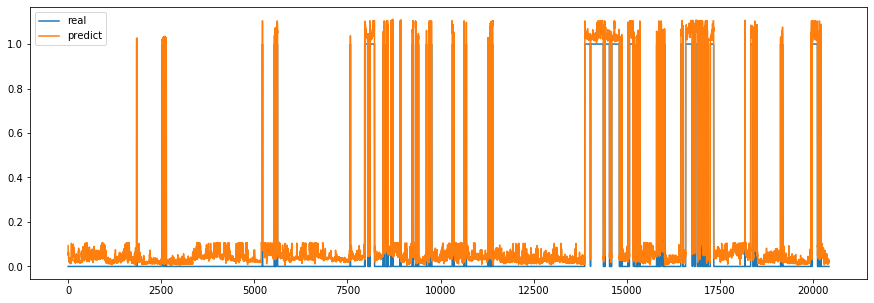

In [52]:
plt.figure(figsize=(15,5))
plt.plot(y, label='real')
plt.plot(model.predict(x), label='predict')
plt.legend()

tensorflow 사용하여 회귀예측

In [45]:
xn.shape, yn.shape

((20433, 13), (20433, 1))

In [46]:
w1 = tf.Variable(tf.random_normal(shape=[13,5]))
b1 = tf.Variable(tf.random_normal(shape=[5]))
w2 = tf.Variable(tf.random_normal(shape=[5,1]))
b2 = tf.Variable(tf.random_normal(shape=[1]))
h1 = tf.sigmoid(tf.matmul(xn, w1) + b1)
out = tf.matmul(h1, w2) + b2
cost = tf.reduce_mean((yn-out)**2)
train = tf.train.GradientDescentOptimizer(0.9).minimize(cost)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

W0917 16:24:50.652738  8648 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [48]:
from sklearn.metrics import r2_score
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(10000):
    _, c = sess.run([train, cost])    
    if i%1000 == 0: print(i, c, r2_score(yn, sess.run(out)))

0 5.6787887 -718.9739934146985
1000 0.0050715622 0.9551137507805488
2000 0.00065136055 0.9941942661302415
3000 0.0004008214 0.9964249917591086
4000 0.00033113526 0.9970459733682248
5000 0.00037721562 0.9966369671940833
6000 0.0002524695 0.9977495812003082
7000 0.00017912431 0.998402473371079
8000 0.00020075636 0.9982092579357497
9000 0.0002517079 0.9977568538008406


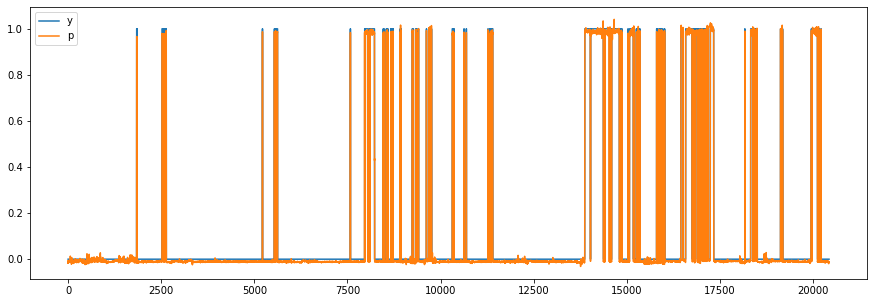

In [51]:
plt.figure(figsize=(15,5))
plt.plot(yn, label='y')
plt.plot(sess.run(out), label='p')
plt.legend()

In [ ]:
minmax 정규화 변형
